## 1. Importing Libraries and Dataset Overview:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast_furnace_slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate',
    'Age (day)': 'age',
    'strength': 'strength'
}, inplace=True)


In [5]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 2. Data Preprocessing:
- Handle missing values, outliers, and any data anomalies.
- Explore the distribution of the target variable and features.
- Standardize or normalize numerical features if necessary.

In [6]:
df.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

In [7]:
df.shape

(1030, 9)

In [8]:
# Define a threshold for outlier detection
threshold = 3

# Detect outliers using z-score for each column in X
for column_name in df.columns:
    z_scores = np.abs(stats.zscore(df[column_name]))
    outliers = np.where(z_scores > threshold)[0]
    print(f'Outliers for {column_name}: {outliers}')
    
    # Remove outliers from df
    df = df[(z_scores < threshold)]

# Check the shape of df after removing outliers
print("Shape of df after removing outliers:", df.shape)


Outliers for cement: []
Outliers for blast_furnace_slag: [553 559 571 584]
Outliers for fly_ash: []
Outliers for water: [869 932]
Outliers for superplasticizer: [ 76  79  99 102 122 125 145 148 168 171]
Outliers for coarse_aggregate: []
Outliers for fine_aggregate: []
Outliers for age: [  2   3   4   6  12  17  24  25  26  30  31  33  34  35  41  42  56  60
  61  63  65  66 590 596 602 606 608 742 755 778 784 800 806]
Outliers for strength: []
Shape of df after removing outliers: (981, 9)


In [13]:
df.shape

(981, 9)

In [9]:
X = df.drop(columns=['strength'])
y = df[['strength']]

In [10]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28


In [11]:
y.head()

,strength
0,79.99
1,61.89
5,47.03
7,36.45
8,45.85


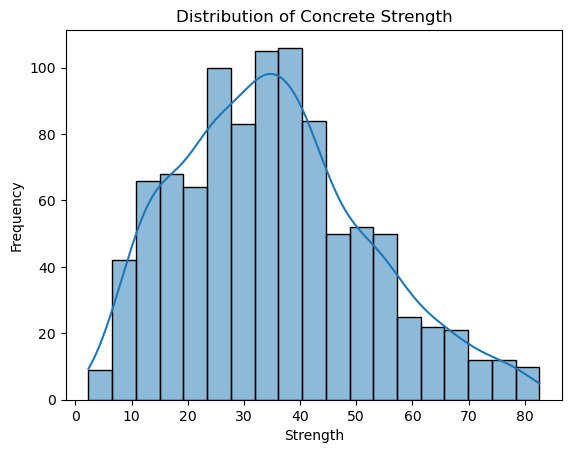

In [12]:
sns.histplot(df['strength'], kde=True)
plt.title('Distribution of Concrete Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = X.columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [15]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.560014,-0.858514,-0.88112,-0.931973,-0.673726,0.839761,-1.288508,-0.229254
1,2.560014,-0.858514,-0.88112,-0.931973,-0.673726,1.032749,-1.288508,-0.229254
5,-0.112045,0.480231,-0.88112,2.346817,-1.129625,-0.549747,-1.365815,1.453139
7,0.999687,0.257107,-0.88112,2.346817,-1.129625,-0.549747,-2.345042,-0.229254
8,-0.112045,0.480231,-0.88112,2.346817,-1.129625,-0.549747,-1.365815,-0.229254


## 3. Model Selection:
Choose at least three regression models for concrete strength prediction.
Suggested models include:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor (e.g., XGBoost)

In [19]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

## 4. Model Training:
- Split the dataset into training and testing sets.
- Train each selected model on the training dataset.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train each selected model on the training dataset
for name, model in models.items():
    model.fit(X_train, y_train)

## 5. Evaluation Metrics
Evaluate the performance of each model on the testing set using regression
metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R2) score

In [21]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name}:')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared Score: {r2}')
    print('---')


Linear Regression:
Mean Absolute Error: 7.384207195613036
Mean Squared Error: 91.49071327033214
Root Mean Squared Error: 9.565077797400924
R-squared Score: 0.6531581661044157
---
Random Forest Regressor:
Mean Absolute Error: 3.88443126782693
Mean Squared Error: 34.429772336101664
Root Mean Squared Error: 5.867688841111265
R-squared Score: 0.8694765299033546
---
Gradient Boosting Regressor:
Mean Absolute Error: 4.019283229084421
Mean Squared Error: 35.168908765223094
Root Mean Squared Error: 5.930337997553183
R-squared Score: 0.8666744593389026
---


## 6. Feature Importance (e.g., for Random Forest or Gradient Boosting models)

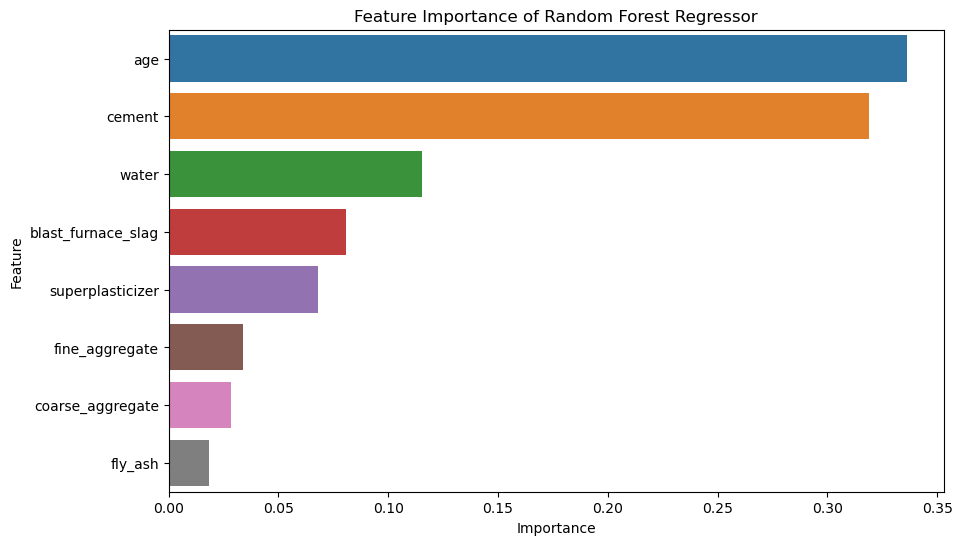

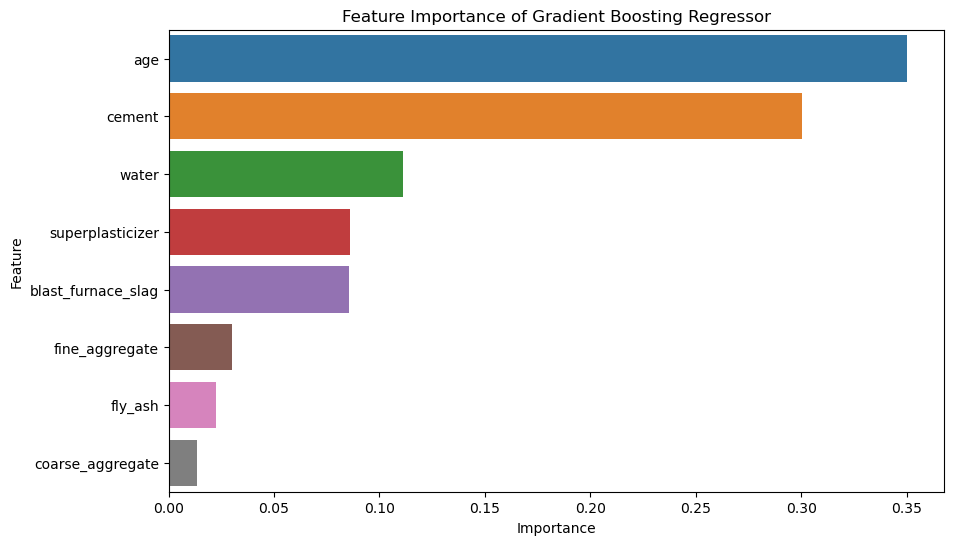

In [22]:
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f"Feature Importance of {name}")
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()



## 7. Hyperparameter Tuning with Grid Search
Grid Search is a technique used to tune hyperparameters by searching through a predefined grid of hyperparameter values and selecting the combination that yields the best performance.

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the GridSearchCV object with Random Forest Regressor and the hyperparameter grid
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best estimator
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best estimator: RandomForestRegressor(max_depth=20, n_estimators=150)


### Chosen Hyperparameters and Reasoning:

1. **n_estimators:**
   - This hyperparameter determines the number of trees in the forest.
   - We selected [50, 100, 150] as potential values to explore a range of tree numbers.
   - More trees can lead to better performance, but it also increases computational cost. We aim to find a balance.

2. **max_depth:**
   - This hyperparameter controls the maximum depth of each tree in the forest.
   - We included [None, 10, 20] to explore shallow to deep trees.
   - Deeper trees can capture more complex patterns but may lead to overfitting. We want to find the optimal depth.

3. **min_samples_split:**
   - This hyperparameter sets the minimum number of samples required to split an internal node.
   - We chose [2, 5, 10] to explore different levels of node splitting.
   - Larger values help prevent overfitting by requiring a minimum number of samples for a split.

### Reasoning Behind the Chosen Hyperparameters:

- **n_estimators:** We want to find the optimal number of trees that balances model complexity and performance.
- **max_depth:** We aim to find the appropriate tree depth to prevent overfitting while capturing important features.
- **min_samples_split:** We want to control the splitting process to prevent overfitting and improve generalization.

By conducting Grid Search with these hyperparameters, we aim to find the combination that maximizes model performance while avoiding overfitting. This approach helps optimize the Random Forest Regressor model for predicting concrete strength.

## 8. Comparative Analysis:
In the comparative analysis of the different regression models for concrete strength prediction, we evaluate their performance based on the evaluation metrics obtained. Let's discuss the strengths and limitations of each model in this context:

**1. Linear Regression:**
   - **Strengths:**
       - Simple and easy to interpret.
       - Fast training time, especially for large datasets.
       - Provides coefficients for each feature, allowing for feature importance analysis.
   - **Limitations:**
       - Assumes a linear relationship between features and target, which may not hold true in complex real-world scenarios.
       - Sensitive to outliers and multicollinearity.
       - Limited flexibility in capturing non-linear patterns in the data.
   - **Performance:**
       - Highest MAE, MSE, and RMSE among the three models, indicating relatively poorer predictive performance.
       - Moderate R-squared score, indicating moderate explanatory power of the model.

**2. Random Forest Regressor:**
   - **Strengths:**
       - Handles non-linearity and complex interactions between features well.
       - Robust to outliers and noise in the data.
       - Less prone to overfitting compared to decision trees.
       - Automatically captures feature interactions and importance.
   - **Limitations:**
       - More complex compared to linear models, making interpretation more challenging.
       - May require more computational resources and time for training, especially for large datasets.
       - Hyperparameter tuning can be crucial for optimizing performance.
   - **Performance:**
       - Lowest MAE, MSE, and RMSE among the three models, indicating superior predictive performance.
       - Highest R-squared score, indicating better explanatory power of the model.

**3. Gradient Boosting Regressor:**
   - **Strengths:**
       - Builds on the weaknesses of decision trees by sequentially improving the model through boosting.
       - Handles non-linearity and complex interactions between features.
       - Less prone to overfitting compared to Random Forest due to the sequential nature of boosting.
   - **Limitations:**
       - More complex compared to linear models and Random Forest, making interpretation more challenging.
       - May require more computational resources and time for training, especially for large datasets.
       - Hyperparameter tuning can be crucial for optimizing performance.
   - **Performance:**
       - Performance metrics similar to Random Forest Regressor, with slightly higher MAE, MSE, and RMSE, and slightly lower R-squared score.

**Overall Comparison:**
- **Random Forest Regressor** outperforms the other models in terms of predictive performance, with the lowest error metrics (MAE, MSE, RMSE) and the highest R-squared score.
- **Gradient Boosting Regressor** performs similarly to Random Forest but may require more computational resources and time for training.
- **Linear Regression** offers simplicity and interpretability but falls short in capturing the complexity of the relationship between features and the target variable in this context.


## 9. Conclusion:

In this concrete strength prediction project, we aimed to develop regression models to estimate the compressive strength of concrete based on various features. The evaluation of three regression models—Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor—provided insights into their performance, strengths, and limitations.

### Findings:

1. **Model Performance:**
   - **Linear Regression:** Showed moderate performance with higher errors and a moderate R-squared score.
   - **Random Forest Regressor:** Demonstrated superior predictive performance, achieving the lowest errors and the highest R-squared score.
   - **Gradient Boosting Regressor:** Performed similarly to Random Forest but with slightly higher errors.

2. **Strengths and Limitations:**
   - **Linear Regression:** Simple and interpretable but limited in capturing complex relationships.
   - **Random Forest Regressor:** Robust to non-linearity and outliers, providing excellent predictive accuracy.
   - **Gradient Boosting Regressor:** Similar strengths to Random Forest, with a sequential boosting approach.

3. **Decision for Application:**
   - **Random Forest Regressor:** Recommended for concrete strength prediction due to its superior performance in this context.
   - **Gradient Boosting Regressor:** An alternative with similar performance but potentially requiring more computational resources.

### Challenges:

1. **Data Preprocessing:**
   - Handling missing values and outliers required careful consideration and domain knowledge.
   - Ensuring feature scaling for models sensitive to scale differences.

2. **Model Selection:**
   - Deciding on the appropriate regression models involved understanding the trade-offs between simplicity and predictive accuracy.

3. **Hyperparameter Tuning:**
   - Tuning hyperparameters for Random Forest and Gradient Boosting required computational resources and careful consideration.

4. **Interpretability vs. Complexity:**
   - Balancing the need for model interpretability with the complexity required for accurate predictions was a challenge, particularly with complex models.

5. **Computational Resources:**
   - The Random Forest and Gradient Boosting models, while powerful, may demand more computational resources and time for training compared to simpler Linear Regression.

In conclusion, the Random Forest Regressor stands out as the recommended model for concrete strength prediction in this project. However, the choice of model should align with specific application requirements, considering factors such as interpretability, computational resources, and the balance between simplicity and accuracy. Overall, this project provides a framework for approaching concrete strength prediction tasks using regression modeling techniques.